## Классификация

In [52]:
import pandas as pd
import numpy as np

In [53]:
from matplotlib import pyplot as plt
import seaborn as sns

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, make_scorer, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from scipy.stats import randint, uniform, norm

In [55]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [56]:
from helper.plots import feature_plots
from helper.utils import data_tools

In [57]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### О наборе данных
#### Контекст
Важно, чтобы компании, выпускающие кредитные карты, могли распознавать мошеннические транзакции по кредитным картам, чтобы клиенты не платили за товары, которые они не покупали.

### 1. Загрузка данных

Создадим переменную для random_state.

In [58]:
SEED = 42

In [59]:
url = "./data/creditcard.csv"
data = pd.read_csv(url)

In [60]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
data.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Данные со временем не меняются, поэтому все представленные данные примерно одинаковые.

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Содержание
Набор данных содержит данные о транзакциях, совершённых по кредитным картам европейскими держателями карт в сентябре 2013 года.
В этом наборе представлены транзакции, совершённые за два дня. Из 284 807 транзакций зафиксировано 492 случая мошенничества. Набор данных крайне несбалансирован: положительный класс (мошенничество) составляет 0,172% от всех транзакций.

Он содержит только числовые входные переменные, полученные в результате PCA-преобразования. К сожалению, из-за проблем конфиденциальности мы не можем предоставить исходные признаки и дополнительную справочную информацию о данных. Признаки V1, V2, … V28 — это главные компоненты, полученные с помощью PCA. Единственные признаки, не преобразованные с помощью PCA, — это «Время» и «Сумма». Признак «Время» содержит количество секунд, прошедших между каждой транзакцией и первой транзакцией в наборе данных. Признак «Сумма» — это сумма транзакции, которую можно использовать для обучения, зависящего от примера и чувствительного к стоимости. Признак «Класс» — это переменная отклика, которая принимает значение 1 в случае мошенничества и 0 в противном случае.

Учитывая коэффициент несбалансированности классов, мы рекомендуем измерять точность с помощью площади под кривой «точность-полнота» (AUPRC). Точность матрицы путаницы не имеет значения для несбалансированной классификации.

### 2. Разведочный анализ данных (EDA)

In [63]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [64]:
print(f'Количество обычных операций: {data['Class'].value_counts()[0]}')
print(f'Количество мошенических операций: {data['Class'].value_counts()[1]}')

Количество обычных операций: 284315
Количество мошенических операций: 492


Данные с сильным дисбалансом классов, поэтому метрику Accuracy применять не будем.

#### 2.1. Проверка на дубликаты

In [65]:
print(f'Количество дубликатов в данных: {data.duplicated().sum()}')

Количество дубликатов в данных: 1081


Посмотрим на дубликаты, исключив столбец `Time`

In [66]:
data[data.duplicated(subset=[col for col in data.columns if col != 'Time'], keep=False)].head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
220,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,0.158497,-1.224951,1.314705,0.304412,-0.290218,-2.014548,-0.772801,0.696761,0.017914,2.177250,-0.276207,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
221,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,0.158497,-1.224951,1.314705,0.304412,-0.290218,-2.014548,-0.772801,0.696761,0.017914,2.177250,-0.276207,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0


Заметим, что строки - дубликаты. Поэтому избавимся от них.

In [67]:
data = data.drop_duplicates()

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [69]:
print(f'Количество дубликатов в данных: {data.duplicated().sum()}')

Количество дубликатов в данных: 0


#### 2.2. Проверка на пропущенные значения

In [70]:
missing_value = data_tools.DataPreprocessor(data).get_missing()
miss_ratio = data_tools.DataPreprocessor(data).get_missing_ratio()

missing = pd.concat([missing_value , miss_ratio], axis=1)
missing.columns = ['count', 'ratio']

In [71]:
display(missing)

,count,ratio


Пропущенных значений нет.

##### 2.3. Оценка типов данных

Выясним какие столбцы с категориальными переменными, а какие с количественными.

In [72]:
numeric_columns_eda = data.select_dtypes(include=['int', 'float']).columns.to_list()
categorical_columns_eda = data.select_dtypes(exclude=['int', 'float']).columns.to_list()

In [73]:
print(f'Категориальные столбцы: {categorical_columns_eda}')
print(f'Количественные столбцы: {numeric_columns_eda}')

Категориальные столбцы: []
Количественные столбцы: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Рассмотрим детальнее количественные фичи.

In [74]:
data[numeric_columns_eda].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


#### 2.4. Количественные переменные

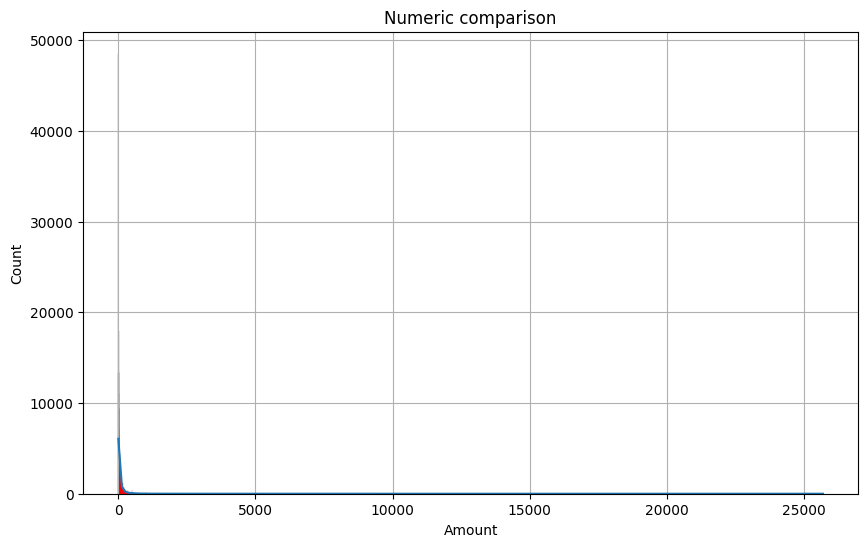

In [75]:
feature_plots.BuildHist(data['Amount']).numeric_plot()

TypeError: BuildHist.numeric_displot() got an unexpected keyword argument 'ax'

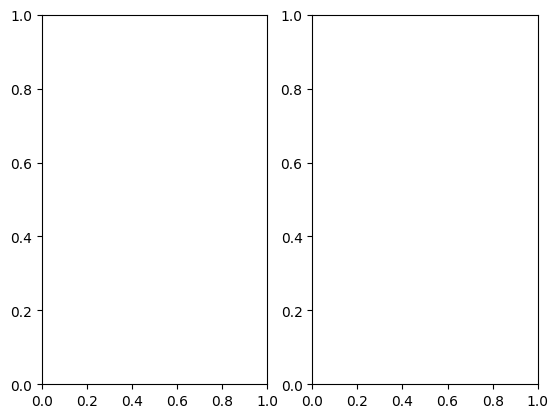

In [84]:
fig, ax = plt.subplots(1, 2)
feature_plots.BuildHist(data['Amount']).numeric_displot(ax=ax[0])
feature_plots.BuildHist(data['Time']).numeric_displot(ax=ax[1])
#ax.plot([amount_plot, time_plot])
plt.show()

(0.0, 25691.16)

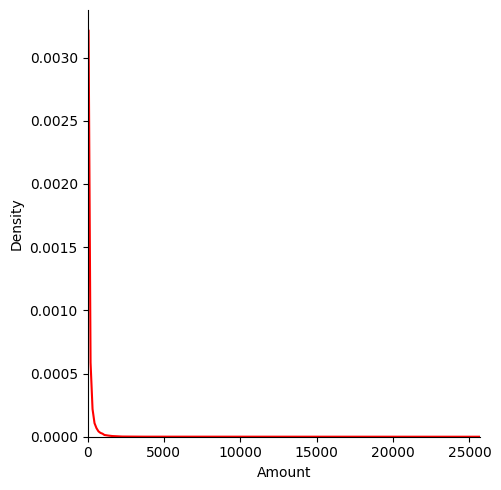

In [77]:
sns.displot(data=data, x='Amount', kind="kde", color='r');
plt.xlim([data['Amount'].min(), data['Amount'].max()])

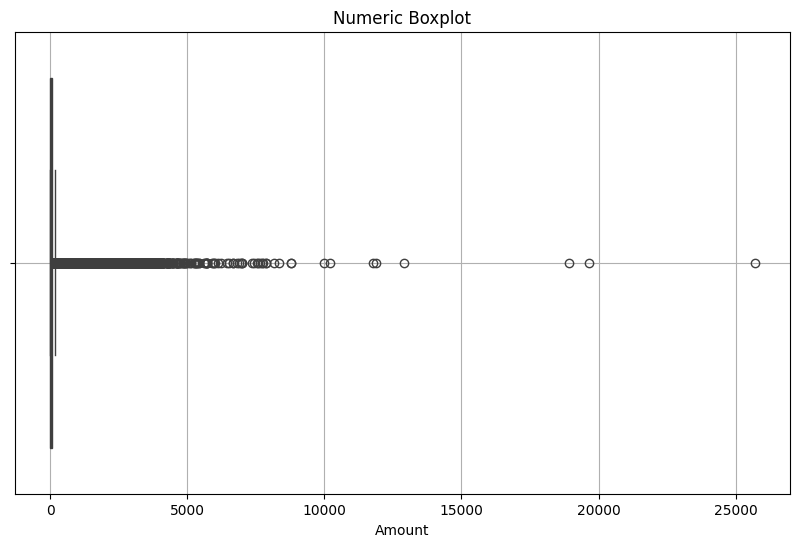

In [78]:
feature_plots.BuildHist(data['Amount']).numeric_boxplot()

### 3. Baseline

Произведем разделение данных на фичи и целевую переменную.

In [79]:
1X_baseline = data.drop(columns=['Class'])
y_baseline = data['Class']

SyntaxError: invalid decimal literal (3394561756.py, line 1)

In [ ]:
X_train_baseline, X_val_baseline, y_train_baseline, y_val_baseline = data_tools.PipelineManager(X_baseline, y_baseline, model=None).data_split()

Из столбцов для количественных фичей удалим целевую метрику.

In [ ]:
numeric_columns_eda = [col for col in numeric_columns_eda if col != 'SalePrice']

Подготовим базовую модель предсказывающую наугад.

In [ ]:
baseline_model = DummyClassifier()

In [ ]:
baseline = data_tools.PipelineManager(X_train_baseline, y_train_baseline, baseline_model).make_pipeline()

In [ ]:
baseline.fit(X_train_baseline, y_train_baseline)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Time', 'V1', 'V2', 'V3',
                                                   'V4', 'V5', 'V6', 'V7', 'V8',
                                                   'V9', 'V10', 'V11', 'V12',
                                                   'V13', 'V14', 'V15', 'V16',
                                                   'V17', 'V18', 'V19', 'V20',
                                                   'V21', 'V22', 'V23', 'V24',
                                                   'V25', 'V26', 'V27', 'V28',
                                                   'Amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('reg', DummyClassifier())])

In [ ]:
predict_dummy = baseline.predict(X_val_baseline)
baseline_recall = round(recall_score(y_val_baseline, predict_dummy), 2)
baseline_presicion = round(precision_score(y_val_baseline, predict_dummy), 2)
baseline_f1 = round(f1_score(y_val_baseline, predict_dummy), 2)

c:\Users\46120\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(f'Recall baseline: {baseline_recall}')
print(f'Precision baseline: {baseline_presicion}')
print(f'F1 baseline: {baseline_f1}')

Recall baseline: 0.0
Precision baseline: 0.0
F1 baseline: 0.0


### 4. Детальное изучение признаков

Видим, что столбец `Time` не несет пользы, поэтому нужно избавиться от него.

In [ ]:
data = data.drop(columns=['Time'], axis=1)

Обратим внимание на столбец `Amount`, в котором разница между 75% и MAX значениями столь велика, что свидельствует о предполагаемом выбросе в данных. Поэтому стоит детальнее изучить MAX значение и его соседей. 

In [ ]:
data.loc[data['Amount'] == data['Amount'].max()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274771,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.34736,-3.872425,-12.005487,6.853897,-9.189418,7.126883,-6.795942,8.877742,17.315112,-7.173805,-1.968044,5.501747,-54.49772,-21.62012,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0


Видно, что V3, V5, V7, V13, V15, V16, V20, V24, V26, V27 являются экстремальными значениями. Изучим соседей.

In [ ]:
data.loc[[idx for idx in range(274768, 274777)]]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274768,0.486276,-2.471735,-2.364582,1.223227,-1.005389,-1.219307,1.061352,-0.410368,1.116937,-1.223225,-0.295656,-0.293250,-1.492289,-1.107589,0.155357,0.026875,1.485871,0.197712,-0.345077,1.288197,0.229141,-0.896450,-0.430514,0.224223,-0.460148,-0.185993,-0.156936,0.117091,785.16,0
274769,-0.579464,1.225374,-0.018154,-0.484512,-0.197764,-1.453759,0.626052,0.227323,0.019987,-0.315055,-0.751937,0.203961,-0.457853,0.475591,-0.405046,-0.090905,-0.069857,-0.807003,-0.275395,-0.057780,-0.224990,-0.567611,0.191688,0.436379,-0.485643,0.120421,0.227590,0.095802,8.97,0
274770,2.062917,0.598278,-3.171718,0.619652,1.216218,-1.370544,0.673803,-0.300302,-0.126312,-0.855396,1.649002,-0.012365,-1.055126,-2.072577,-0.622510,0.546502,1.984455,1.122227,-0.024084,-0.164416,-0.023905,0.065600,-0.040816,0.574319,0.340788,0.661243,-0.090195,-0.024159,0.76,0
274771,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,-12.005487,6.853897,-9.189418,7.126883,-6.795942,8.877742,17.315112,-7.173805,-1.968044,5.501747,-54.497720,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
274772,-0.326792,0.753066,0.895097,-0.929977,0.508010,-0.161923,0.344583,0.213609,0.108578,-1.336297,1.084353,0.605676,-0.050776,-1.207277,-0.300263,0.770115,0.101974,0.940696,0.051901,-0.049708,-0.114144,-0.317744,0.034411,0.636580,-0.768998,-0.399396,0.182096,0.210994,0.77,0
274773,1.864030,-0.638611,-1.114996,0.347982,-0.524606,-1.000850,0.010440,-0.171802,1.356083,-0.204454,-1.205091,-0.355384,-1.894410,0.481490,-0.028431,-0.476607,0.062980,-0.506691,0.266397,-0.189235,-0.128197,-0.384620,0.167522,-0.043649,-0.172760,-0.088832,-0.049435,-0.045112,91.78,0
274774,-4.604338,-4.143663,-1.373886,0.929251,4.121777,-3.329206,-1.872346,0.316613,0.289329,-0.590549,-0.878203,0.349476,0.162143,-0.410919,0.085548,0.546250,0.626674,-0.271191,-0.145037,-0.336733,-0.288804,-1.079790,-1.655092,0.726175,-1.578233,-0.021391,1.166309,-1.198216,3.58,0
274775,-0.898085,0.753647,-0.407364,0.068195,2.295660,-0.785978,1.657798,-0.363186,-0.742937,-0.820361,1.029034,0.353930,-0.370493,-1.193366,-1.734718,0.049593,0.343953,0.575420,-0.782332,-0.121882,0.064692,0.397887,-0.152407,0.577252,0.373053,-0.713722,-0.156449,-0.002953,30.55,0
274776,-0.628148,0.556467,0.368790,-0.459354,1.268096,-1.381631,1.344402,-0.484324,-0.248057,-1.142483,-0.390156,-0.317839,0.050319,-1.032416,0.595555,0.005322,0.288837,0.560009,-0.557685,0.194372,0.282966,0.873247,-0.313332,-0.076190,0.335196,-0.128414,-0.072769,-0.058676,54.95,0


Несмотря на то что выброс с классом 1, от него придется избавиться, т.к. эта строчка слишком с экстримальными данными.

In [ ]:
index_anomaly = data.loc[data['Amount'] == data['Amount'].max()].index

In [ ]:
data = data.drop(index=index_anomaly)

#### 4.1. Исследование Amount

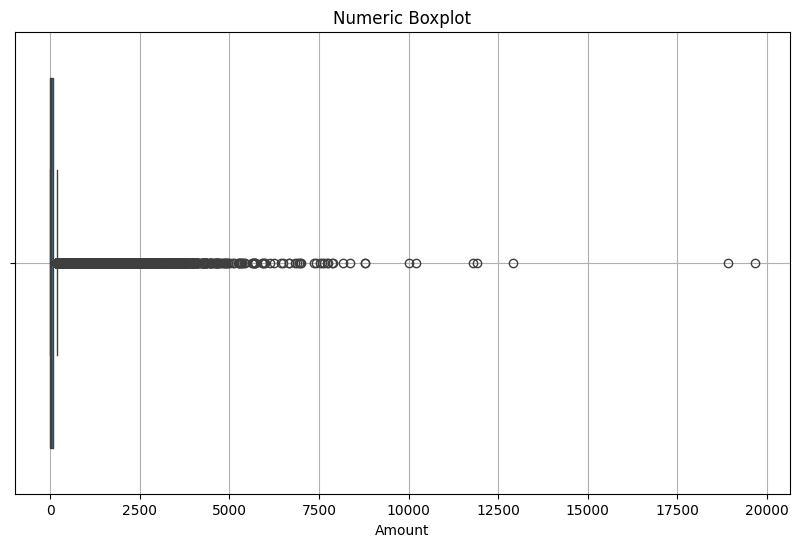

In [ ]:
feature_plots.BuildHist(data['Amount']).numeric_boxplot()

Почти все значения сконцентрированы около нуля. Посмотрим на данные, где `Amount`  больше 10000.

In [ ]:
data.loc[data['Amount'] >= 10000]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,-5.533256,1.446695,0.902675,1.746979,2.354131,0.801598,2.068475,1.413407,0.748320,-3.637371,26.237391,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,-5.545590,1.067549,0.832726,1.592166,2.788521,2.569520,2.721505,-0.613875,3.490798,-3.838863,24.133894,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,-8.423404,1.186360,1.879982,3.496723,4.082503,1.406178,0.773133,0.902964,5.041069,-7.213527,39.420904,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,-8.908182,-0.083514,-2.281866,3.739366,5.989210,2.582162,3.032874,0.530779,4.712398,-6.938297,38.117209,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,-5.341249,0.713033,1.361297,1.410760,2.969936,1.441114,1.134212,0.297532,1.340820,-4.392421,23.649095,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
227921,-21.532478,-34.704768,-8.303035,10.264175,3.957175,-3.229695,-4.066768,-4.083971,0.554072,-2.166867,0.939705,3.108922,0.808613,4.109779,3.017039,0.554018,1.174609,0.601035,-4.353679,19.746453,5.198718,-7.331078,-32.828995,0.118986,-8.696627,-1.778061,-0.519786,2.716716,10000.00,0
284249,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,-7.776435,0.214173,-4.499851,0.241005,0.537895,2.901938,2.326099,-0.402142,1.257379,2.008145,2.454553,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


#### 4.2. Оценка важности признаков

In [ ]:
X = data.drop(columns=['Class'])
y = data['Class']

Произведем отбор признаков через RandomForest.

In [ ]:
numeric_columns = X.select_dtypes(include=['int', 'float']).columns.to_list()
categorical_columns= X.select_dtypes(exclude=['int', 'float']).columns.to_list()

In [ ]:
X_train, X_val, y_train, y_val = data_tools.PipelineManager(X, y, model=None).data_split(test_size=0.2)

#### 4.3. Проверка на мультиколлениарность

In [ ]:
#scaler = StandardScaler()

In [ ]:
#matrix, fig = data_tools.DataPreprocessor(train).check_multicollinearity(scaler, threshold=0.5)

#### 5. Обучение моделей

##### 5.1. RandomForest

In [ ]:
1forest_params = {
    'reg__n_estimators' : randint(20, 700),
    'reg__max_depth' : randint(3, 20),
    'reg__min_samples_split': randint(2, 10),
    'reg__min_samples_leaf': randint(1, 4)
}

SyntaxError: invalid decimal literal (2061947877.py, line 1)

In [ ]:
forest = RandomForestClassifier(n_jobs=-1)

In [ ]:
forest_pipe = data_tools.PipelineManager(X_train, y_train, forest).train_model(forest_params)

In [ ]:
best_forest = forest_pipe.best_estimator_

In [ ]:
predict_forest = best_forest.predict(X_val_baseline)
baseline_recall = round(recall_score(y_val_baseline, predict_dummy), 2)
baseline_presicion = round(precision_score(y_val_baseline, predict_dummy), 2)
baseline_f1 = round(f1_score(y_val_baseline, predict_dummy), 2)

In [ ]:
print(f'Recall baseline: {baseline_recall}')
print(f'Precision baseline: {baseline_presicion}')
print(f'F1 baseline: {baseline_f1}')

##### 5.2. XGBoost

#### 5.3 Catboost

##### 5.4. Итоговая оценка на тестовой выборке

#### 6. Вывод 